In [27]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)

4.1.0


In [3]:
images_dir = "./../data/images"
image_files = os.listdir(images_dir)

In [4]:
image_path = "{}/{}".format(images_dir, "car_1.jpg")

In [5]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

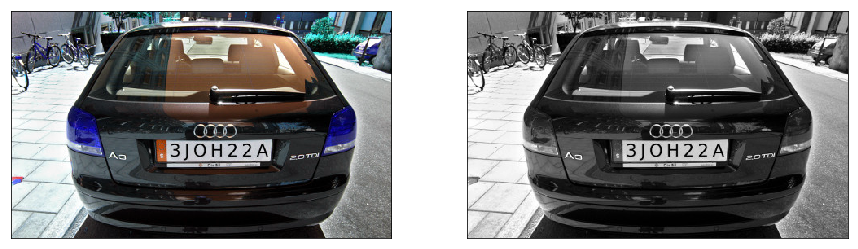

In [7]:
plot_images(image, gray)

In [8]:
blur = cv2.bilateralFilter(gray, 11,90, 90)
#car_1 11,90,90
#car_4 11,50,50
#car_6 11,100,100

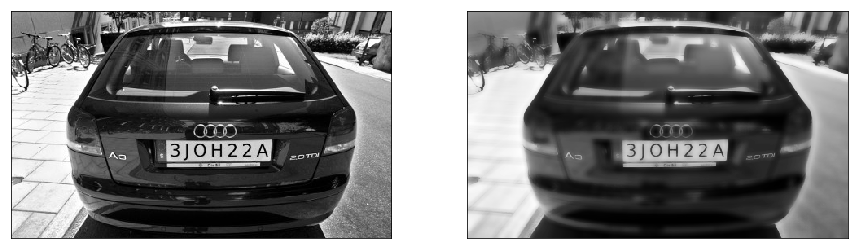

In [9]:
plot_images(gray, blur)

In [10]:
edges = cv2.Canny(blur, 30, 200)

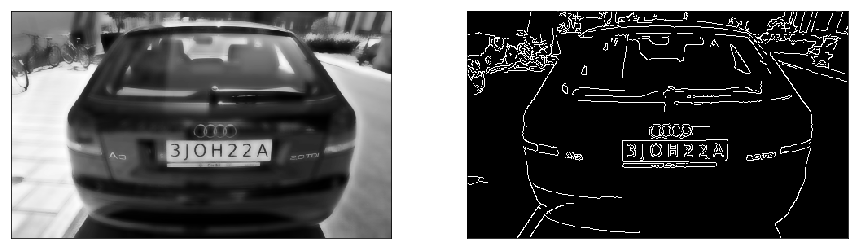

In [11]:
plot_images(blur, edges)

In [12]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
image_copy = image.copy()

In [14]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

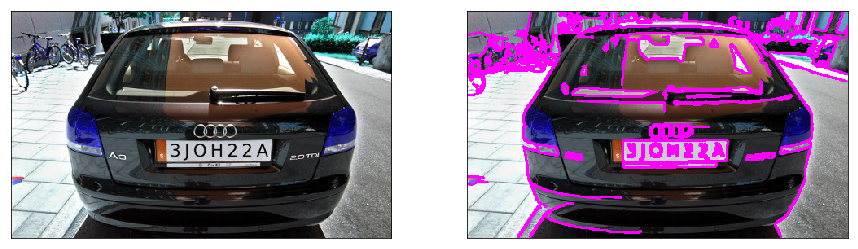

In [15]:
plot_images(image, image_copy)

In [16]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30] #here we have to select only those
#contour area which has large contour are and reject all small contour area so 
#it will consider number plate area 

In [17]:
print(len(cnts))

30


In [18]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

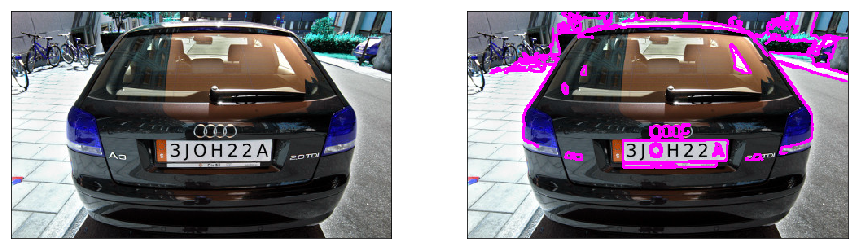

In [19]:
plot_images(image, image_copy)

In [20]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)  #Second argument specify whether shape is a closed contour (if passed True), or just a curve.
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)   #try to approximate number of size or edges that has bounded your figure 
    #second parameter is epsilon which is maximum distance from contour to approximated contour
    print(edges_count)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

[[[320 161]]

 [[191 160]]

 [[191 185]]

 [[317 185]]]


True

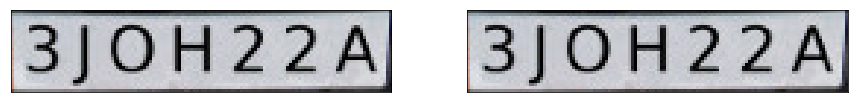

In [21]:
plot_images(plate, plate)

In [22]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\abc\AppData\Local\tesseract.exe'
text = pytesseract.image_to_string(plate, lang='eng')

In [23]:
print(text)

3JOH22A


In [24]:
import mysql.connector

In [25]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    port='3306',
    database="CarData"
)

print('database connected successfully')

database connected successfully


In [26]:
mycursor = mydb.cursor()
mycursor.execute("SELECT number_plate FROM anpr")

myresult = mycursor.fetchall()
# print(myresult)

for np in myresult:
#     print(np)
    if(np[0]==text):
        print('detected')
    else:
        print('not')

detected
